In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = data.data
y = data.target

In [10]:
dfFeatures = pd.DataFrame(data=X,columns=data.feature_names)
dfFeatures.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
dfFeatures.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [12]:
dfFeatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


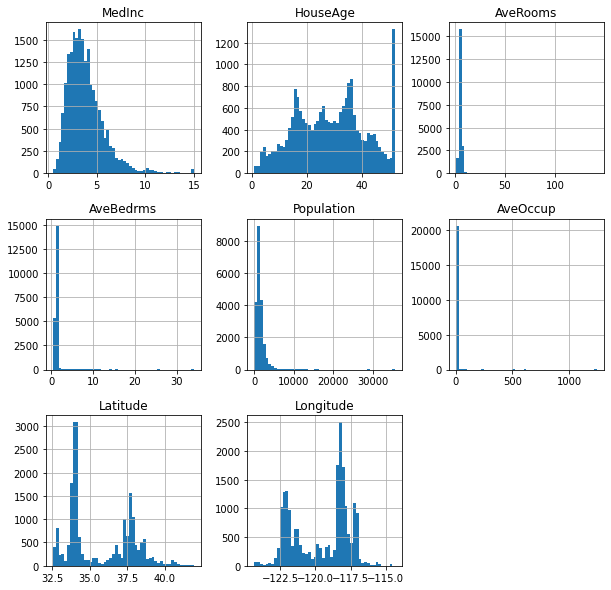

In [13]:
dfFeatures.hist(figsize=(10,10),bins=50);

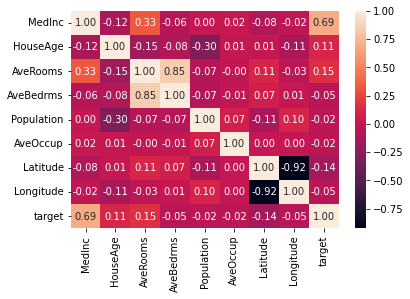

In [14]:
dfSample = dfFeatures.copy()
dfSample["target"] = data.target
corr = dfSample.corr()
fig = plt.Figure(figsize=(15,15))
sns.heatmap(corr,annot=True,fmt='.2f');

In [15]:
import warnings
warnings.filterwarnings("ignore")
def detect_outliers(df):
    cols = list(df)
    outliers = pd.DataFrame(columns = ["Feature", "Outlier"])
    for col in cols:
        if col in df.select_dtypes(include=np.number).columns:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - 1.5 * iqr
            fence_high = q3 + 1.5 * iqr
            outliers = outliers.append({'Feature':col,'Number of Outliers':df.loc[(df[col] < fence_low) | (df[col] > fence_high)].shape[0]}, ignore_index=True)
    return outliers
detect_outliers(dfSample)

,Feature,Outlier,Number of Outliers
0,MedInc,NaN,681.0
1,HouseAge,NaN,0.0
2,AveRooms,NaN,511.0
3,AveBedrms,NaN,1424.0
4,Population,NaN,1196.0
5,AveOccup,NaN,711.0
6,Latitude,NaN,0.0
7,Longitude,NaN,0.0
8,target,NaN,1071.0


Temizleme 1 => Tüm Dataset 

In [16]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# dfCikti = dfSample[~((dfSample < (Q1 - 1.5 * IQR)) |(dfSample > (Q3 + 1.5 *
# IQR))).any(axis=1)]

Temizleme 2

In [17]:
# var1 = df.MedInc.quantile(0.50)
# var2 = df.MedInc.quantile(0.95)
# df['MedInc'] = np.where(df['MedInc'] > var2, var1, df['MedInc'])

Temizleme 3

In [18]:
# df["MedInc"] = df["MedInc"].map(lambda i: np.log(i) if i > 0 else 0)

Temizleme 4

In [19]:
# df["col1"] = np.where(df["col1"] <3845.2, 3845.2,df[col1])
# df["col1"] = np.where(df["col1"] >15987.0, 15987.0,df[col1])

Temizleme 5

In [20]:
# index = df[(df['col1'] >= 100)|(df['col1'] <= 18)].index
# df.drop(index, inplace=True)
# df['col1'].describe()

In [21]:
Q1 = dfSample.quantile(0.25)
Q3 = dfSample.quantile(0.75)
IQR = Q3 - Q1
dfCikti = dfSample[~((dfSample < (Q1 - 1.5 * IQR)) |(dfSample > (Q3 + 1.5 *
IQR))).any(axis=1)]

In [22]:
dfCikti

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
...,...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56,1.168
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [23]:
X = dfCikti.iloc[:,:-1]
y = dfCikti.iloc[:,-1]


Verilerin test ve eğitim verisi olarak bölünmesi

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


Verilerin Ölçeklendirilmesi (Feature Scaling)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7
0,-0.956776,0.786020,-1.790109,2.403400,0.123359,2.635775,-0.748549,0.714914
1,2.939627,-0.934530,2.453371,-0.635585,-0.922895,0.718977,-0.986919,0.985286
2,0.066888,-0.361014,-1.108066,1.269289,0.717568,-1.882866,-0.762570,0.589741
3,0.723002,0.949882,0.606598,-1.389270,-0.157772,0.430033,-0.930832,0.654831
4,0.224369,0.540227,0.446458,0.013881,-0.125825,-0.000256,1.069607,-1.192712
...,...,...,...,...,...,...,...,...
13044,-0.279516,1.113744,-0.935710,-1.821793,-1.234375,-0.037148,0.835911,-1.287843
13045,-0.392013,-0.197152,-0.766045,0.578973,1.822924,-0.447895,-0.739201,0.749962
13046,1.808028,-0.606807,2.476819,-1.074759,-0.855807,0.213155,0.934063,-1.127622
13047,-0.984900,0.294434,-0.230007,-0.669577,0.227186,1.113362,0.242323,0.139121


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [27]:
models = []
models.append(("LR",LinearRegression()))
models.append(("RF",RandomForestRegressor()))
models.append(("DT",DecisionTreeRegressor()))
models.append(("SVR",SVR()))

In [30]:
from sklearn.model_selection import cross_val_score,KFold
seed=5
results=[]
names=[]
for name,model in models:
    kfold = KFold(n_splits=5,random_state=7,shuffle=True)
    cv_results=cross_val_score(model,X_train_scaled,y_train,cv=kfold)
    results.append(cv_results)
    names.append(name)
    print(f"{name} {cv_results.mean()} {cv_results.std()}")

LR 0.6375104611090701 0.010529126210749943
RF 0.7740144320438054 0.011006989167005756
DT 0.5468700804119946 0.018999894407513512
SVR 0.7309547077075127 0.005496206261574491


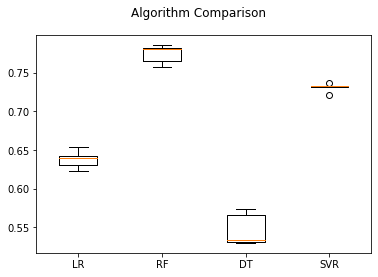

In [32]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Ödev: RandomForestRegressor Hiperparametrelerini Kullanarak ve GridSearchCV methodu ile modelin iyileştirilmesini sağlamak
using GridSearchCV with RandomForestReggressor
fetch_california_housing